In [138]:
import pandas as pd
import matplotlib.pyplot as plt


In [139]:
df = pd.read_csv('./data.csv')
# df


## DATA TABLE [DATETIME: 2023-10-16T16:39:48]

In [140]:
# data transformation
new_rows = {}
for _, row in df.iterrows():
    seq_num = row['seq_number']
    if row['seq_number'] not in new_rows:
        new_rows[seq_num] = {}
    msg_type = row['msg_type_str']
    new_rows[seq_num][msg_type] = row['msg_value']
trans_df = pd.DataFrame(new_rows).transpose()
# trans_df


In [141]:
# clean data
trans_df_means = trans_df.mean()
trans_df = trans_df.fillna(trans_df_means)
trans_df.index = trans_df.index - trans_df.index[0]
trans_df


,READ_TEMPERATURE,READ_PRESSURE,READ_WEIGHT
0,30.6,90.5,16.499133
1,30.6,90.5,16.546448
2,30.6,90.5,16.527811
3,30.6,90.5,16.499133
4,30.6,90.5,16.552660
...,...,...,...
192,30.6,90.5,16.541616
193,30.6,90.5,16.499133
194,30.6,90.5,16.520218
195,30.6,90.5,16.552660


In [142]:
# utils
def plot_series(x: list, xlabel: str, values: list[dict]):
    plt.figure(figsize=(12, 6))
    plt.xlabel(xlabel)
    plt.grid()
    
    for series in values:
        series_name = series['name']
        y = series['y']
        plt.plot(x, y, label=series_name)
    
    plt.legend()
    plt.show()


## TEMPERATURE

In [143]:
# basic stats [READ_TEMPERATURE]
trans_df['READ_TEMPERATURE'].describe()


count    197.0
mean      30.6
std        0.0
min       30.6
25%       30.6
50%       30.6
75%       30.6
max       30.6
Name: READ_TEMPERATURE, dtype: float64

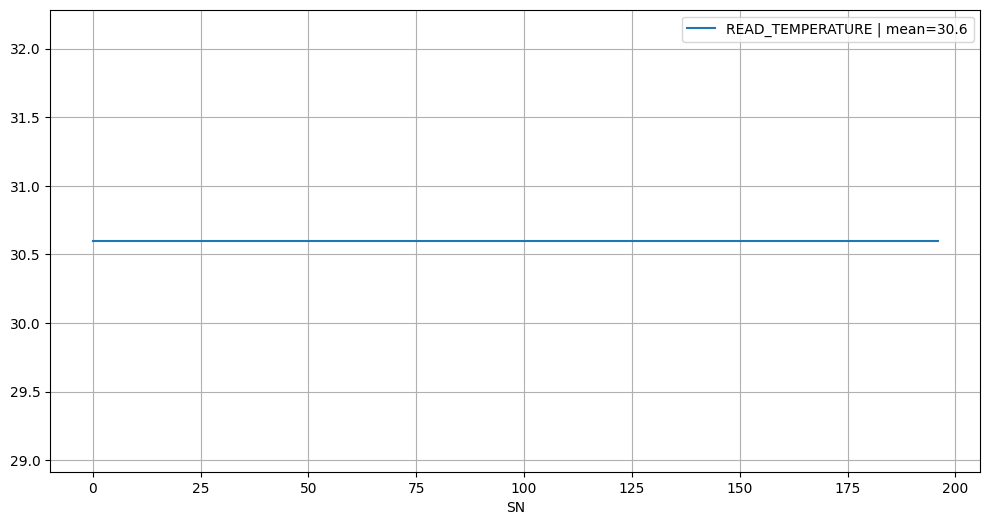

In [144]:
# plot data
x = trans_df.index.to_list()
series_name = 'READ_TEMPERATURE'
plot_series(
    x=x,
    xlabel='SN',
    values=[{'name': f"{series_name} | mean={round(trans_df_means[series_name], 3)}", 'y': trans_df[series_name].to_list()}],
)


## PRESSURE STATS

In [145]:
# basic stats [READ_PRESSURE]
trans_df['READ_PRESSURE'].describe()


count    197.0
mean      90.5
std        0.0
min       90.5
25%       90.5
50%       90.5
75%       90.5
max       90.5
Name: READ_PRESSURE, dtype: float64

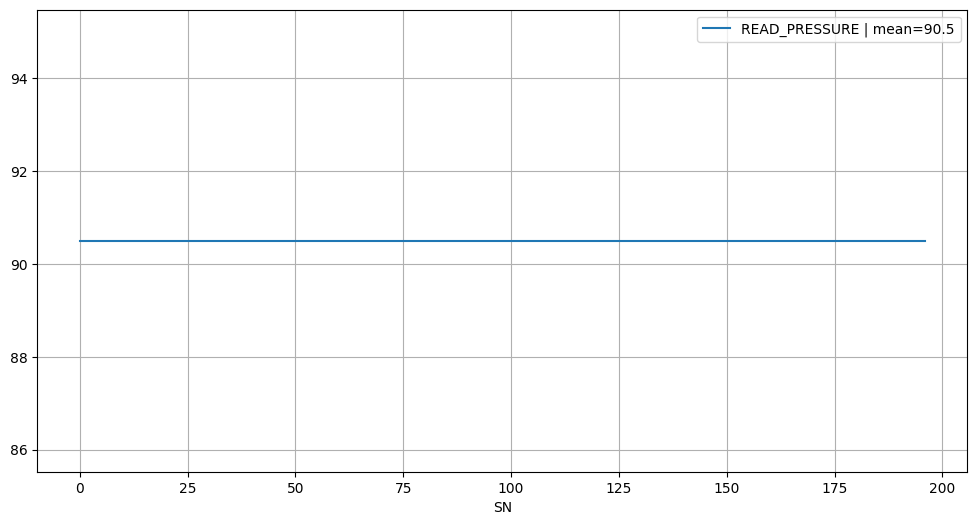

In [146]:
# plot data
x = trans_df.index.to_list()
series_name = 'READ_PRESSURE'
plot_series(
    x=x,
    xlabel='SN',
    values=[{'name': f"{series_name} | mean={round(trans_df_means[series_name], 3)}", 'y': trans_df[series_name].to_list()}],
)


## WEIGHT STATS

In [147]:
# basic stats [READ_WEIGHT]
trans_df['READ_WEIGHT'].describe()


count    197.000000
mean      16.499133
std        0.096431
min       15.956244
25%       16.499133
50%       16.500198
75%       16.544376
max       16.600290
Name: READ_WEIGHT, dtype: float64

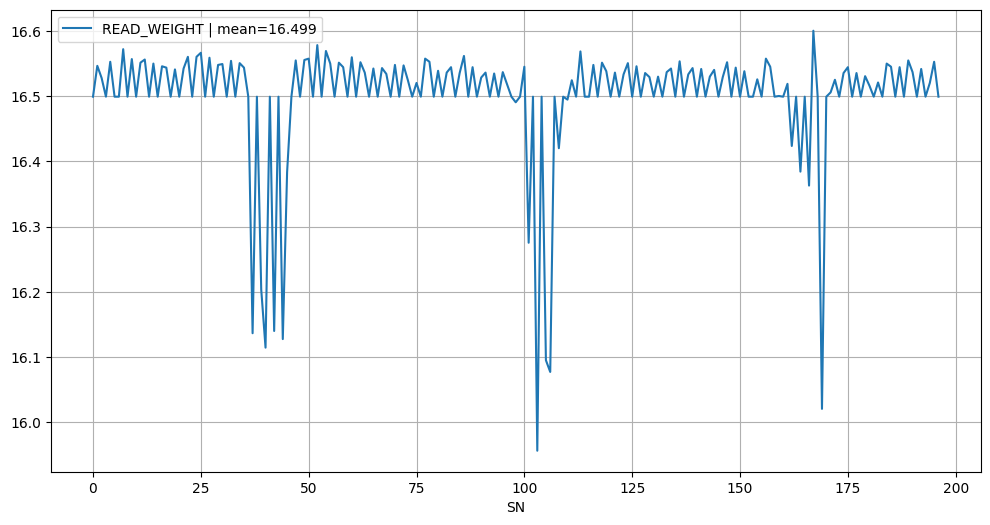

In [148]:
# plot data
x = trans_df.index.to_list()
series_name = 'READ_WEIGHT'
plot_series(
    x=x,
    xlabel='SN',
    values=[{'name': f"{series_name} | mean={round(trans_df_means[series_name], 3)}", 'y': trans_df[series_name].to_list()}],
)


In [149]:
# plot_series(
#     x=[1, 2, 3, 4, 5],
#     xlabel='time',
#     values=[
#         {
#             'name': 'test_series_1',
#             'y': [1, 2, 3, 4, 5],
#         },
#         {
#             'name': 'test_series_2',
#             'y': [2, 4, 6, 8, 10],
#         },
#         {
#             'name': 'test_series_3',
#             'y': [3, 6, 9, 12, 15],
#         },
#     ],
# )


In [150]:
# # plot data
# x = trans_df.index.to_list()
# values = [{'name': f"{s} | mean={round(trans_df_means[s], 3)}", 'y': trans_df[s].to_list()} for s in ['READ_TEMPERATURE', 'READ_PRESSURE', 'READ_WEIGHT']]
# plot_series(
#     x=x,
#     xlabel='SN',
#     values=values,
# )
